# Etapa 1 - Apresentação do tema

**Tema: O que afeta as notas do Enem**

Acresentar no trabalho correlações de algumas variáveis com o resultado obtido. Identificar correlações espúrias.

Motivação Teórica: 
1) Predição do desempenho das disciplinas do ENEM utilizando técnicas de ciêncida de dados.


Mudança no trabalho para a modelagem:
- Recorde Espacial: Ex: Trabalhar só com Estado de SP para minimizar o tamanho dos dados.
- Criar um problema de Classificação
    - Modelos: KNN, árvore de decisão, regresão logistica, svm, emsable
    - Avaliar as métricas dos modelos
    - Agrupando por ano os alunos por município, ex.: Média dos alunos de São Paulo. E mostrar para o leitor a evolução por ano dessa média das capitais. Aumentou as Notas mínima, máxima, média, ver o intervalo de confiança? em relação a outros municípios pequenos. E montar um MAPA com a Geovisualização. Essa parte seria a EDA

- Se for falar de causalidade, usar a regração linear
    - Nível de significancia test F
    - Normalidade dos resíduos
    - o R^2
    - A normalidade dos resíduos
    - A autocorrelação dos resíduos
    - Heteroelasticidade dos resíduos
    - "endoelasticidade"

Quando acrecenta na nota do aluno em relação a quantidade de banheiros na casa?

Determinante do desempenho escolar
Previsão das notas

Clustering 
Depois que agrupou ser as similariadades e se possível classificar algo.

---

In [1]:
# Caminho das Funções no OS
import os 
import sys
sys.path.append(os.getcwd())

# Bancos de Dados
import sqlite3
import random

# data manipulation
import pandas as pd
import numpy as np
from functions.data_manipulation import *

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from functions.data_visualization import *
%matplotlib inline

# coordenadas geográficas
import geopandas as gpd
import geobr


from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

# Outros
from tqdm import tqdm #Barra de progresso
from math import sqrt

# warnings
import warnings
warnings.filterwarnings('ignore')

# set some options in pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_info_columns', 200)
pd.set_option('display.max_info_rows', 200)
pd.set_option('display.max_rows', 200)

In [2]:
from scipy import stats
from scipy.stats import pearsonr

# clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# metrics and model selection
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import (confusion_matrix, 
                             classification_report,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             auc,
                             roc_auc_score,
                             silhouette_score
                            )

In [3]:
# modelagem
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder

# outros
import gc
import warnings
from pylab import rcParams
from functools import reduce

In [4]:
# conda install mscorefonts
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

Fonte dos Dados
1. INEP: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados
2. OCDE: http://stats.oecd.org/Index.aspx?DatasetCode=RGRADSTY

## Carregando os dados:

In [5]:
#Carregando os dados
#df_19_15 = reduce_mem_usage(pd.read_csv('df_19_15_new.csv', encoding = "utf-8", sep = ','))
df = pd.read_csv('df_23_F.csv', encoding = "utf-8", sep = ',')

In [6]:
df.head()

,Inscricao,Ano,Genero,Estado_Civil,Cor,Faixa_Etaria,Município_Prova,SG_UF,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação,Treineiro,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Media
0,210061103945,2023,0,1,1,21,Caxias do Sul,RS,502.0,498.9,475.6,363.2,700.0,0,0,4,2,0,5,2,0,1,3,1,A,B,A,B,A,B,A,A,B,A,A,A,A,0,1,507.94
1,210060214087,2023,0,1,3,17,Fortaleza,CE,459.0,508.5,507.2,466.7,880.0,0,3,3,1,1,5,2,0,1,1,0,A,B,A,A,A,A,A,A,B,A,A,D,A,0,1,564.28
2,210059980948,2023,0,1,3,18,Quixadá,CE,402.5,379.2,446.9,338.3,560.0,0,1,1,0,0,4,1,0,1,0,0,A,B,A,A,A,A,A,A,B,A,A,B,A,0,0,425.38
3,210060801601,2023,1,1,1,26,Batatais,SP,564.7,630.3,610.4,680.2,600.0,0,0,4,0,3,2,5,0,1,2,1,B,B,B,B,A,B,A,B,C,B,A,C,A,1,1,617.12
4,210059085130,2023,1,1,3,23,Natal,RN,644.9,620.2,626.9,736.3,860.0,0,5,2,3,1,4,1,0,2,2,0,A,B,A,B,A,B,A,B,B,A,A,E,A,1,1,697.66


## Dataprep

In [6]:
# substitui notas missing por zero
#for coluna in lista_targets:
    #df[coluna] = df[coluna].fillna(0)
    
# Lebel Encoder
for coluna in lista_vars_explicativas:
    try:
        # substitui valores missings por um valor negativo arbitrário (para o modelo tentar capturar)
        df[coluna] = df[coluna].astype(float).replace(np.nan, -99999)
    except:
        # substitui valores missings por um valor categórico arbitrário (para o modelo tentar capturar)
        df[coluna] = df[coluna].astype(str).fillna("missing").replace("nan", "missing")
        # labelencoder
        labelencoder = LabelEncoder()
        labelencoder.fit_transform(list(set(df[coluna].unique().tolist())))
        df[coluna] = labelencoder.transform(df[coluna])

# Etapa 4 - Modelagem

Algoritmo_Lasso

In [20]:
# lista de variáveis explicativas para utilizar no modelo
lista_vars_explicativas = ['Ano', 'Genero', 'Estado_Civil', 'Faixa_Etaria', 'Escolaridade_pai', 'Escolaridade_mae', 
                           'Ocupacao_pai', 'Ocupacao_mae', 'Renda_mensal_familiar', 'Computador', 'Internet' ]

lista_targets = ['Ciencias_Natureza', 'Humanas', 'Linguagem', 'Matemática', 'Redação']

In [21]:
# Divisão das Variaveis
Variaveis_Socio_Economico = ['Escolaridade_pai', 'Escolaridade_mae', 'Ocupacao_pai', 'Ocapacao_mae', 'Pessoas_residencia', 'Renda_mensal_familiar',
                             'Empregada_domestico', 'Quantidade_banheiros', 'Quantidade_quartos', 'Quantidade_carros', 'Quantidade_moto','Geladeira',
                             'Freezer', 'Maquina_lavar', 'Maquina_secar', 'Microondas', 'Lava_louca', 'Aspirador_po', 'TV', 'DVD', 'TV_assinatura','Celular',
                             'Telefone_fixo', 'Computador', 'Internet']

#Variaveis_Atendimento_Especializado = ['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF']
#Variaveis_Cadastrais = ['NU_INSCRICAO', 'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO']

In [22]:
lista_df_submissao, lista_erros_treino, lista_erros_teste = algoritmo_lasso(df, lista_targets, lista_vars_explicativas)

***************
Ciencias_Natureza
***************
	Computador, 13.608
	Genero, 8.901
	Renda_mensal_familiar, 5.004
	Ocupacao_pai, 4.096
	Escolaridade_mae, 3.647
	Ocupacao_mae, 2.687
	Escolaridade_pai, 2.244
	Faixa_Etaria, 0.846
Erro de treino: 70.15010132010818
Erro de teste: 70.23665670040091
***************
Humanas
***************
	Computador, 14.000
	Ocupacao_pai, 4.880
	Renda_mensal_familiar, 4.413
	Escolaridade_mae, 4.232
	Ocupacao_mae, 2.945
	Escolaridade_pai, 2.205
	Internet, 1.859
	Faixa_Etaria, 0.901
Erro de treino: 77.13354174651869
Erro de teste: 77.25206796208313
***************
Linguagem
***************
	Computador, 11.202
	Ocupacao_pai, 4.802
	Escolaridade_mae, 3.924
	Renda_mensal_familiar, 3.526
	Ocupacao_mae, 2.950
	Internet, 2.618
	Escolaridade_pai, 1.941
	Faixa_Etaria, 0.225
Erro de treino: 66.48694050365705
Erro de teste: 66.59301438442283
***************
Matemática
***************
	Genero, 26.148
	Computador, 21.039
	Renda_mensal_familiar, 8.878
	Ocupacao_pai, 7.235

Métrica utilizada: MCRMSE (Mean Columnwise Root Mean Squared Error)

In [23]:
# Junta predições em um único dataframe
path_output_submission='submission.csv'
print ('Erros de treino:', lista_erros_treino)
print ('Erros de teste:', lista_erros_teste)
print ('Erro médio de treino:', np.mean(lista_erros_treino))
print ('Erro médio de teste:', np.mean(lista_erros_teste))
df_submit_prediction = reduce(lambda left, right: pd.merge(left, right,on=['Inscricao'], how='inner'), lista_df_submissao)
df_submit_prediction.to_csv(path_output_submission, sep=',', index=False)
print (df_submit_prediction.shape)
df_submit_prediction.head()

Erros de treino: [70.15010132010818, 77.13354174651869, 66.48694050365705, 105.66641738697233, 188.7967326449807]
Erros de teste: [70.23665670040091, 77.25206796208313, 66.59301438442283, 105.70809165392099, 188.6578620388674]
Erro médio de treino: 101.6467467204474
Erro médio de teste: 101.68953854793905
(2152164, 6)


,Inscricao,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação
0,210061103945,472.819375,505.749582,502.672227,486.812709,605.080141
1,210060214087,471.113722,502.593743,501.819631,492.375258,629.609501
2,210059980948,448.390640,476.525252,476.418798,446.831246,557.126196
3,210060801601,514.437782,536.570126,524.823104,554.724302,574.645310
4,210059085130,502.724657,527.524129,520.405128,541.342296,580.619133


---

Cluster

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import pandas as pd
import numpy as np

In [10]:
#Carregando os dados
#df_19_15 = reduce_mem_usage(pd.read_csv('df_19_mini.csv', encoding = "utf-8", sep = ','))
#df = pd.read_csv('df.csv', encoding = "utf-8", sep = ',')

In [25]:
print(df.shape)
#Removendo o NAN IDADE
df.dropna(how = 'any', subset = 'Faixa_Etaria', inplace = True)
print(df.shape)

(2152164, 40)
(2152164, 40)


In [26]:
df.head()

,Inscricao,Ano,Genero,Estado_Civil,Cor,Faixa_Etaria,Município_Prova,SG_UF,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação,Treineiro,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Media
0,210061103945,2023,0,1,1,21,Caxias do Sul,RS,502.0,498.9,475.6,363.2,700.0,0,0,4,2,0,5,2,0,1,3,1,A,B,A,B,A,B,A,A,B,A,A,A,A,0,1,507.94
1,210060214087,2023,0,1,3,17,Fortaleza,CE,459.0,508.5,507.2,466.7,880.0,0,3,3,1,1,5,2,0,1,1,0,A,B,A,A,A,A,A,A,B,A,A,D,A,0,1,564.28
2,210059980948,2023,0,1,3,18,Quixadá,CE,402.5,379.2,446.9,338.3,560.0,0,1,1,0,0,4,1,0,1,0,0,A,B,A,A,A,A,A,A,B,A,A,B,A,0,0,425.38
3,210060801601,2023,1,1,1,26,Batatais,SP,564.7,630.3,610.4,680.2,600.0,0,0,4,0,3,2,5,0,1,2,1,B,B,B,B,A,B,A,B,C,B,A,C,A,1,1,617.12
4,210059085130,2023,1,1,3,23,Natal,RN,644.9,620.2,626.9,736.3,860.0,0,5,2,3,1,4,1,0,2,2,0,A,B,A,B,A,B,A,B,B,A,A,E,A,1,1,697.66


In [38]:
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Inscricao,2152164.0,2.100600e+11,1123029.4,2.100580e+11,2.100590e+11,2.100600e+11,2.100609e+11,2.100621e+11
Ano,2152164.0,2.023000e+03,0.0,2.023000e+03,2.023000e+03,2.023000e+03,2.023000e+03,2.023000e+03
Genero,2152164.0,4.000000e-01,0.5,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Estado_Civil,2152164.0,1.000000e+00,0.4,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
Cor,2152164.0,2.000000e+00,1.0,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Faixa_Etaria,2152164.0,2.090000e+01,6.3,1.600000e+01,1.800000e+01,1.800000e+01,2.100000e+01,7.000000e+01
Ciencias_Natureza,2152164.0,4.998000e+02,80.4,3.161000e+02,4.415000e+02,4.947000e+02,5.524000e+02,8.684000e+02
Humanas,2152164.0,5.279000e+02,86.2,2.932000e+02,4.713000e+02,5.337000e+02,5.889000e+02,8.230000e+02
Linguagem,2152164.0,5.210000e+02,74.4,2.870000e+02,4.734000e+02,5.248000e+02,5.728000e+02,8.208000e+02
Matemática,2152164.0,5.353000e+02,126.3,3.198000e+02,4.301000e+02,5.209000e+02,6.289000e+02,9.586000e+02


In [28]:
df.columns.to_list()[-1]

'Media'

In [29]:
# filtra as colunas que serão usadas no K-Means
X = df[df.columns.to_list()[-2:]]
X.head()

,Internet,Media
0,1,507.94
1,1,564.28
2,0,425.38
3,1,617.12
4,1,697.66


In [30]:
lista = ['Media', 'Faixa_Etaria']

In [32]:
X = df[lista]

In [33]:
print(X.shape)
X.head(2)

(2152164, 2)


,Media,Faixa_Etaria
0,507.94,21
1,564.28,17


In [34]:
# instancia a função para padronizar os dados
scaler = StandardScaler()

In [35]:
# padroniza a matriz X
X_scaled = scaler.fit_transform(X)

In [36]:
X_scaled

array([[-0.36373934,  0.01419171],
       [ 0.23366548, -0.61609446],
       [-1.23916962, -0.45852292],
       ...,
       [-0.03481677, -0.45852292],
       [ 0.34267012,  1.58990713],
       [ 0.1028175 , -0.61609446]])

In [78]:
# instancia o algoritmo KMeans
kmeans = KMeans(n_clusters = 4, random_state = 5)

In [79]:
# fita com a matriz X padronizada
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=5)

In [80]:
# rótulos obtidos pelo K-means
labels = kmeans.labels_
# centróides
centroids = kmeans.cluster_centers_

In [81]:
# rótulos após o agrupamento
labels

array([1, 1, 0, ..., 1, 2, 1], dtype=int32)

In [82]:
# coordendas dos centróides
centroids

array([[-1.10259187, -0.21175352],
       [ 0.07921682, -0.26943384],
       [-0.45541929,  2.88439305],
       [ 1.33230572, -0.25077581]])

In [83]:
X.head()

,Media,Faixa_Etaria,Cluster
0,507.94,21,1
1,564.28,17,1
2,425.38,18,2
3,617.12,26,0
4,697.66,23,0


In [84]:
# adiciona a coluna labels do rótulos obtidos pelo K-Means
X['Cluster'] = labels

In [85]:
X.head()

,Media,Faixa_Etaria,Cluster
0,507.94,21,1
1,564.28,17,1
2,425.38,18,0
3,617.12,26,3
4,697.66,23,3


In [86]:
df['Cluster'] = labels

In [87]:
df.head()

,Inscricao,Ano,Genero,Estado_Civil,Cor,Faixa_Etaria,Município_Prova,SG_UF,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação,Treineiro,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Media,Cluster
0,210061103945,2023,0,1,1,21,Caxias do Sul,RS,502.0,498.9,475.6,363.2,700.0,0,0,4,2,0,5,2,0,1,3,1,A,B,A,B,A,B,A,A,B,A,A,A,A,0,1,507.94,1
1,210060214087,2023,0,1,3,17,Fortaleza,CE,459.0,508.5,507.2,466.7,880.0,0,3,3,1,1,5,2,0,1,1,0,A,B,A,A,A,A,A,A,B,A,A,D,A,0,1,564.28,1
2,210059980948,2023,0,1,3,18,Quixadá,CE,402.5,379.2,446.9,338.3,560.0,0,1,1,0,0,4,1,0,1,0,0,A,B,A,A,A,A,A,A,B,A,A,B,A,0,0,425.38,0
3,210060801601,2023,1,1,1,26,Batatais,SP,564.7,630.3,610.4,680.2,600.0,0,0,4,0,3,2,5,0,1,2,1,B,B,B,B,A,B,A,B,C,B,A,C,A,1,1,617.12,3
4,210059085130,2023,1,1,3,23,Natal,RN,644.9,620.2,626.9,736.3,860.0,0,5,2,3,1,4,1,0,2,2,0,A,B,A,B,A,B,A,B,B,A,A,E,A,1,1,697.66,3


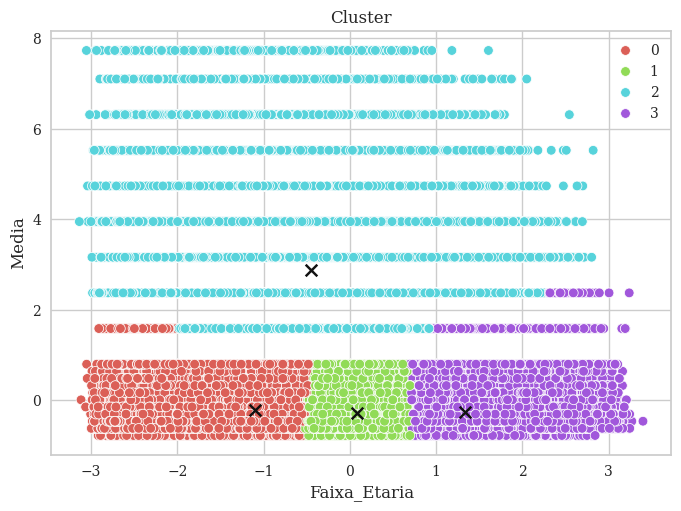

In [88]:
sns.scatterplot(x = X_scaled[:,0],y = X_scaled[:,1],
                hue = labels,
                palette = sns.color_palette("hls", 4));
plt.xlabel('Faixa_Etaria', fontsize=12);plt.ylabel('Media', fontsize = 12);plt.title('Cluster')
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 70,color = 'k');

Agora Identificar o perfil de cada Cluster. Similaridade

In [89]:
df.Cluster.value_counts(normalize = True)

Cluster
1    0.403175
0    0.280381
3    0.237561
2    0.078883
Name: proportion, dtype: float64

In [90]:
df.groupby(by = 'Cluster')[['Ciencias_Natureza', 'Humanas', 'Linguagem', 'Matemática', 'Redação']].mean()

,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação
Cluster,,,,,
0,433.481755,445.439598,451.727654,424.889037,434.227650
1,494.375860,532.418658,527.498891,530.708667,661.595761
2,492.565737,521.691885,504.266363,482.033734,495.968758
3,589.596225,619.720047,597.208809,691.157012,840.219531


Grupos de média de idades por média de notas.
- Qual caracteríscas desse alunos em comum?
- Pesquisar nas colunas para deferenciar os cluster.
- Classificar dados essas caracteríscas

-----------

Outra funcionalidade interessante que vale a pena dar uma olhada é o método fit_transform().
- O método fit_transform() executa o K-means para agrupar os dados e retorna uma tabela de distâncias.
- A tabela de distâncias é criada de forma que em cada instância contém os valores de distância em relação a cada cluster.

In [91]:
distance = pd.concat([pd.DataFrame(kmeans.fit_transform(X)), pd.Series(labels)], axis = 1)
distance.columns = list(range(0, 4))+['Cluster']

In [92]:
distance.head()

,0,1,2,3,Cluster
0,9.608913,177.201629,75.611111,101.790338,1
1,66.081038,120.894812,19.559499,158.210170,1
2,73.039553,259.769676,158.190878,19.699112,0
3,118.893618,68.289497,34.081434,211.009147,3
4,199.339520,12.938499,114.154498,291.512848,3


-----------------

Método Elbow

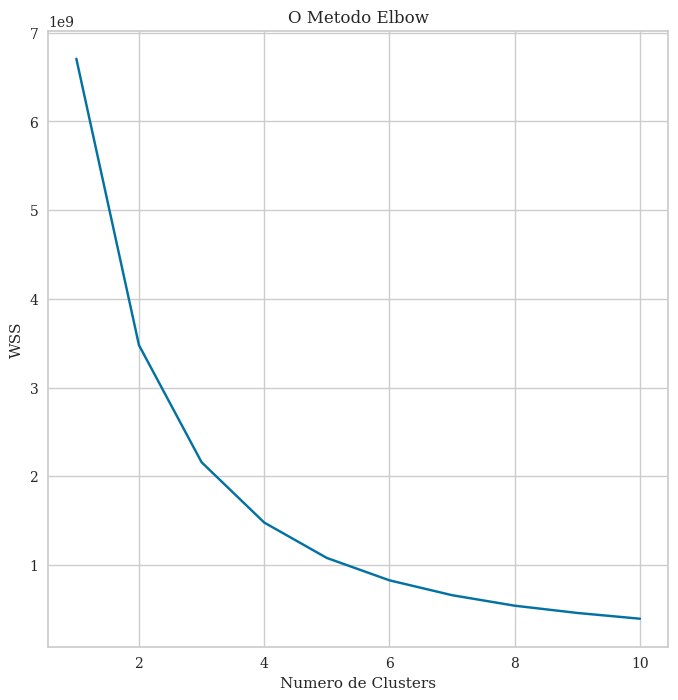

In [93]:
plt.figure(figsize=(8,8))

# plotando o gráfico do método elbow
wcss = []
 
for i in range(2, 12):#testan valor de k entre 2 e 11
    #kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#Veja a listagem dos valores do atributo inertia_ (wcss)
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [94]:
wcss_df = pd.DataFrame({'WCSS': wcss, 'k': np.arange(2, 12)})
wcss_df

,WCSS,k
0,6.707534e+09,2
1,3.478186e+09,3
2,2.158039e+09,4
3,1.478390e+09,5
4,1.078988e+09,6
5,8.266330e+08,7
6,6.591936e+08,8
7,5.406434e+08,9
8,4.589370e+08,10
9,3.939070e+08,11


In [95]:
#from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

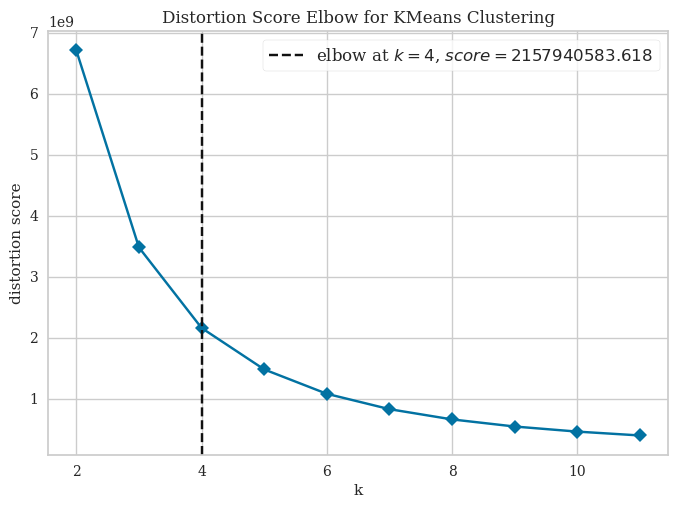

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [96]:
visualizer = KElbowVisualizer(kmeans, k=(2, 12), timings=False)

visualizer.fit(X)
visualizer.show()

Silhouette Score

In [97]:
kmeans.labels_

array([10,  6,  9, ...,  4,  6,  6], dtype=int32)

In [98]:
sillhoute_scores = []
n_cluster_list = np.arange(2,4).astype(int) #testan valor de k entre 2 e 11

for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))

KeyboardInterrupt: 

In [ ]:
plt.plot(n_cluster_list, sillhoute_scores)
plt.show()

-------------------

Outros

In [7]:
print(np.isnan(X).any(axis=1))

NameError: name 'X' is not defined

In [ ]:
np.where(np.isnan(X))

In [ ]:
where = np.where(np.isnan(X))
where

In [ ]:
# Elimina NAN do array numpy
X = X[~np.isnan(X)]

-------------------

DBSCAN

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
#from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Carregando os dados
#df_19_15 = reduce_mem_usage(pd.read_csv('df_19_mini.csv', encoding = "utf-8", sep = ','))
df_23_22_SP = pd.read_csv('df_23_22_SP_M_01.csv', encoding = "utf-8", sep = ',')

In [63]:
print(df_23_22_SP.shape)
#Removendo o NAN IDADE
df_23_22_SP.dropna(how = 'any', subset = 'Faixa', inplace = True)
print(df_23_22_SP.shape)

(634135, 40)
(634124, 40)


In [64]:
df_23_22_SP.head()

,INSCRICAO,ANO,IDADE,SEXO,ESTADO_CIVIL,COR,TREINEIRO,MUNICIPIO,SG_UF,CIENCIAS_NATUREZA,HUMANAS,LINGUAGENS,MATEMATICA,REDACAO,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocapacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestico,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,MEDIA
0,190001592266,2019,17.0,M,1,1,0,São Paulo,SP,543.9,548.1,502.5,480.7,400.0,E,E,B,B,5,F,A,B,C,B,A,B,B,B,A,B,A,A,B,A,B,C,B,B,B,495.04
1,190002037437,2019,25.0,F,1,1,0,Brasília,DF,576.6,637.3,584.2,673.3,380.0,E,E,B,B,4,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,570.28
2,190001184600,2019,19.0,M,1,3,0,Macapá,AP,465.2,513.8,489.9,547.2,520.0,H,H,B,A,3,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,507.22
3,190001867759,2019,44.0,F,1,1,0,Fazenda Rio Grande,PR,494.1,568.8,546.4,565.9,660.0,B,D,B,B,4,E,A,B,D,A,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,567.04
4,190002037440,2019,17.0,M,1,3,0,Brasília,DF,389.7,431.1,482.0,529.7,560.0,B,E,A,B,4,B,B,B,C,B,A,B,A,B,A,B,A,A,B,B,A,D,A,A,A,478.50


In [65]:
lista = ['MEDIA', 'IDADE']

In [66]:
X = df_19_15[lista]

In [67]:
print(X.shape)
X.head(2)

(634124, 2)


,MEDIA,IDADE
0,495.04,17.0
1,570.28,25.0


In [ ]:
#Criar 1000 pontos aletorios ao redor dos 3 pontos centrais criados abaixo, com desvio padrao também informado

centers = [[1, 0.5], [2, 2], [1, -1]]
stds = [0.1, 0.4, 0.3]

SEED = 0

#labels_true recebe os num do grupos para cada x

X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state = SEED)

#print(X)
#print(X.shape)
#print(labels_true)

In [68]:
# teste do DBSCAN com um novo eps
dbscan = DBSCAN(eps = 0.2, min_samples = 10)
dbscan.fit(X) 
labels = dbscan.labels_

In [ ]:
# plot dos resultados
fig = plt.figure(figsize=(8, 8))
#hue: colere conforme criterio passado (labes estabelecidas por DBSCAN)
sns.scatterplot(X[:,0], X[:,1], 
                hue=["cluster-{}".format(x) for x in labels]) 
plt.savefig("dbscan_dumb.png", dpi=300)

In [ ]:
sns.scatterplot(x = X_scaled[:,0],y = X_scaled[:,1],
                hue = labels,
                palette = sns.color_palette("hls", 4));
plt.xlabel('IDADE', fontsize=12);plt.ylabel('MEDIA', fontsize = 12);plt.title('Cluster')
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 70,color = 'k');

---------------------

-----------------

"O que afeta as notas do Enem?"
- Estimação Paramétrica.

In [8]:
import statsmodels.api as sm
import scipy.stats
#from statsmodels.graphics.gofplots import qqplot
#from statsmodels.stats.outliers_influence import variance_inflation_factor 
#from yellowbrick.regressor import ResidualsPlot

In [9]:
#Carregando os dados
#df_19_15 = reduce_mem_usage(pd.read_csv('df_19_mini.csv', encoding = "utf-8", sep = ','))
df = pd.read_csv('df_23_F.csv', encoding = "utf-8", sep = ',')

In [12]:
print(df.shape)
#Removendo o NAN IDADE
df.dropna(how = 'any', subset = 'Faixa_Etaria', inplace = True)
print(df.shape)

(2152164, 40)
(2152164, 40)


In [13]:
df.head()

,Inscricao,Ano,Genero,Estado_Civil,Cor,Faixa_Etaria,Município_Prova,SG_UF,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação,Treineiro,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Media
0,210061103945,2023,0,1,1,21,Caxias do Sul,RS,502.0,498.9,475.6,363.2,700.0,0,0,4,2,0,5,2,0,1,3,1,A,B,A,B,A,B,A,A,B,A,A,A,A,0,1,507.94
1,210060214087,2023,0,1,3,17,Fortaleza,CE,459.0,508.5,507.2,466.7,880.0,0,3,3,1,1,5,2,0,1,1,0,A,B,A,A,A,A,A,A,B,A,A,D,A,0,1,564.28
2,210059980948,2023,0,1,3,18,Quixadá,CE,402.5,379.2,446.9,338.3,560.0,0,1,1,0,0,4,1,0,1,0,0,A,B,A,A,A,A,A,A,B,A,A,B,A,0,0,425.38
3,210060801601,2023,1,1,1,26,Batatais,SP,564.7,630.3,610.4,680.2,600.0,0,0,4,0,3,2,5,0,1,2,1,B,B,B,B,A,B,A,B,C,B,A,C,A,1,1,617.12
4,210059085130,2023,1,1,3,23,Natal,RN,644.9,620.2,626.9,736.3,860.0,0,5,2,3,1,4,1,0,2,2,0,A,B,A,B,A,B,A,B,B,A,A,E,A,1,1,697.66


In [32]:
features_cols = ['Escolaridade_mae','Escolaridade_pai', 'Genero',
                 'Ocupacao_pai', 'Ocupacao_pai', 'Internet', 'Computador',
                 'Renda_mensal_familiar', 'Empregada_domestica']

In [16]:
df.head()

,Inscricao,Ano,Genero,Estado_Civil,Cor,Faixa_Etaria,Município_Prova,SG_UF,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação,Treineiro,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Media
0,210061103945,2023,0,1,1,21,Caxias do Sul,RS,502.0,498.9,475.6,363.2,700.0,0,0,4,2,0,5,2,0,1,3,1,A,B,A,B,A,B,A,A,B,A,A,A,A,0,1,507.94
1,210060214087,2023,0,1,3,17,Fortaleza,CE,459.0,508.5,507.2,466.7,880.0,0,3,3,1,1,5,2,0,1,1,0,A,B,A,A,A,A,A,A,B,A,A,D,A,0,1,564.28
2,210059980948,2023,0,1,3,18,Quixadá,CE,402.5,379.2,446.9,338.3,560.0,0,1,1,0,0,4,1,0,1,0,0,A,B,A,A,A,A,A,A,B,A,A,B,A,0,0,425.38
3,210060801601,2023,1,1,1,26,Batatais,SP,564.7,630.3,610.4,680.2,600.0,0,0,4,0,3,2,5,0,1,2,1,B,B,B,B,A,B,A,B,C,B,A,C,A,1,1,617.12
4,210059085130,2023,1,1,3,23,Natal,RN,644.9,620.2,626.9,736.3,860.0,0,5,2,3,1,4,1,0,2,2,0,A,B,A,B,A,B,A,B,B,A,A,E,A,1,1,697.66


In [19]:
#features_cols = ['Computador', 'Internet', 'Renda_mensal_familiar', 'Escolaridade_pai', 'Escolaridade_mae']
#features_cols = ['Gênero']
y = df['Matemática']
X = df[features_cols]
X = sm.add_constant(X)

model = sm.OLS(y,X)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Matemática   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                 1.146e+05
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:58:38   Log-Likelihood:            -1.3086e+07
No. Observations:             2152164   AIC:                         2.617e+07
Df Residuals:                 2152155   BIC:                         2.617e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   408.77

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [21]:
features_df = df[features_cols]
target = df['Matemática']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target, random_state = 77)

In [23]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [25]:
decision_tree.score(X_train, y_train)

0.34025149325770476

In [26]:
decision_tree.score(X_test, y_test)

0.27613381825959427

In [27]:
y_pred = decision_tree.predict(X_test)

In [28]:
mean_squared_error(y_test, y_pred)

np.float64(11530.009241543852)

In [29]:
import matplotlib.pyplot as plt

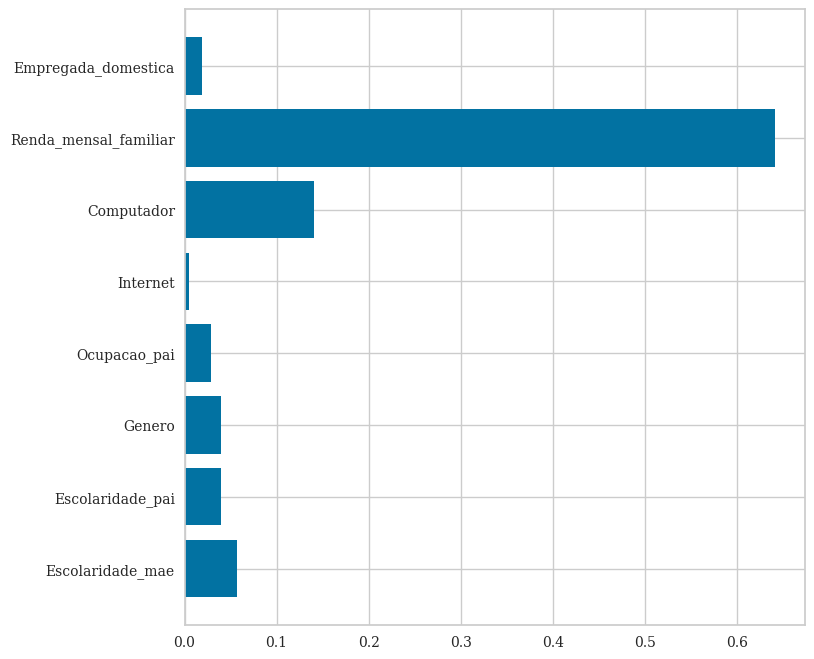

In [31]:
plt.figure(figsize = (8,8))
plt.barh(
    decision_tree.feature_names_in_,
    decision_tree.feature_importances_
);

 TEMA:
 
 - 

Modelo Catboost
- https://medium.com/data-hackers/entendendo-catboost-um-guia-quase-definitivo-b28bc153a78
- https://towardsdatascience.com/deep-dive-into-catboost-functionalities-for-model-interpretation-7cdef669aeed

In [ ]:
import catboost